## King County House Sale Analysis

## 1. Overview

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
# Read dataset
KingCounty_df = pd.read_csv('KingCountyHouseSales.csv')
KingCounty_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print(KingCounty_df.columns.tolist()) # examine column names for unusual characters or difficult to understand names

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [4]:
# Summary information about the dataframe
KingCounty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
KingCounty_df.nunique() #count unique values in each column

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [6]:
# Check if the id field contains duplicated values. If it does, it cannot be used as the index field.
KingCounty_df.duplicated(subset=['id']).sum()

177

The id field contains 177 duplicated values. It cannot be set as the index field for the dataframe. We will use the default index field when importing data from the csv file. The id field is dropped then.

In [7]:
# Drop fields
KingCounty_df.drop(['id'],axis=1,inplace=True)

## 2. Data Preparation

In [8]:
KingCounty_df['bedrooms'].value_counts() #checking bedroom values because 13 unique values seemed high

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [9]:
KingCounty_df.loc[KingCounty_df['bedrooms'] > 7] #checking sq ft of houses that have over 8 bedrooms

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1660,20141204T000000,490000.0,8,5.00,2800,2580,2.0,0,0,3,8,1880,920,1997,0,98122,47.6086,-122.303,1800,2580
4035,20141007T000000,2150000.0,8,6.00,4340,9415,2.0,0,0,3,8,4340,0,1967,0,98004,47.6316,-122.202,2050,9100
4067,20150219T000000,373000.0,8,3.00,2850,12714,1.0,0,0,3,7,2850,0,1959,0,98055,47.4859,-122.205,1480,4942
4096,20140507T000000,599999.0,9,4.50,3830,6988,2.5,0,0,3,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291
4235,20150106T000000,700000.0,9,3.00,3680,4400,2.0,0,0,3,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450
6079,20140808T000000,1280000.0,9,4.50,3650,5000,2.0,0,0,3,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000
6174,20140703T000000,340000.0,8,2.75,2790,6695,1.0,0,0,3,7,1470,1320,1977,0,98133,47.7565,-122.331,1760,7624
8546,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
8757,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
9077,20150318T000000,700000.0,8,2.50,2280,3000,1.5,0,0,3,7,1210,1070,1911,0,98105,47.6675,-122.316,1610,3000


In [10]:
#Appears as if the one definitive error is the 1620 sq ft house having 33 bedrooms.
#Most likely an typo so will change to 3 bedrooms

In [11]:
KingCounty_df.loc[KingCounty_df.bedrooms == 33, 'bedrooms'] = 3
KingCounty_df['bedrooms'].value_counts() #checking bedroom values after the change

3     9825
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [12]:
KingCounty_df['bathrooms'].value_counts() #checking bathroom values because 30 unique values seems high

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [13]:
#high number of unique values because values are floats (most likely denotes powder rooms, half baths, ensuites)
KingCounty_df.loc[KingCounty_df['bathrooms'] > 6.0] #checking sq ft of houses with more than 6 bathrooms

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4024,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,2,3,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190
7252,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8546,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
9254,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
12777,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
14556,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
18302,20140702T000000,3300000.0,5,6.25,8020,21738,2.0,0,0,3,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969
20578,20150328T000000,1180000.0,6,6.50,6260,10955,2.0,0,0,3,11,4840,1420,2007,0,98075,47.5947,-122.039,2710,12550
21506,20140509T000000,2238890.0,5,6.50,7270,130017,2.0,0,0,3,12,6420,850,2010,0,98027,47.5371,-121.982,1800,44890


In [14]:
#There does not appear to be an unusually large number of bathrooms for sqft_living so no values will be edited

### Feature Engineering

In [15]:
# Extract the sale year and month from the "date" field
KingCounty_df['sale_year']=KingCounty_df['date'].str[:4].astype('int64')
KingCounty_df['sale_month']=KingCounty_df['date'].str[4:6].astype('int64')
KingCounty_df['sale_year_month'] = KingCounty_df['date'].str[:6]
KingCounty_df['sale_year_month'] = pd.to_datetime(KingCounty_df['sale_year_month'], format='%Y%m').dt.to_period('M')

In [16]:
# Calculate the age of the house at time of sale
KingCounty_df['age']=KingCounty_df['sale_year'] - KingCounty_df['yr_built']

In [17]:
# Calculate the number of years since renovation.
# If yr_renovated = 0, reno_years = age of the house. If yr_renovated > 0, reno_years = sale_year - yr_renovated
KingCounty_df.loc[KingCounty_df.yr_renovated == 0,'reno_years'] = KingCounty_df['age']
KingCounty_df.loc[KingCounty_df.yr_renovated != 0,'reno_years'] = KingCounty_df['sale_year'] - KingCounty_df['yr_renovated']
KingCounty_df['reno_years'] = KingCounty_df['reno_years'].astype('int64')

### Missing Data

In [18]:
# Check if there is null value in any columns
pd.isnull(KingCounty_df).sum()

date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
sale_year          0
sale_month         0
sale_year_month    0
age                0
reno_years         0
dtype: int64

In [19]:
# There is no null values. However, there are records with bedrooms = 0 and bathrooms = 0. We assume these are missing values.
# There are 13 records with bedrooms = 0
KingCounty_df.loc[KingCounty_df.bedrooms == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,sale_year_month,age,reno_years
875,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,...,98102,47.6362,-122.322,2360,4000,2014,6,2014-06,24,24
3119,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,3,...,98133,47.7145,-122.356,1470,1399,2015,2,2015-02,9,9
3467,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,3,...,98125,47.7222,-122.290,1430,1650,2014,8,2014-08,15,15
4868,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,2,...,98118,47.5260,-122.261,2170,6000,2014,10,2014-10,61,61
6994,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,3,...,98053,47.6642,-122.069,4740,35061,2014,6,2014-06,24,24
8477,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,3,...,98042,47.3473,-122.151,2500,8751,2014,11,2014-11,29,29
8484,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,3,...,98038,47.3493,-122.053,1810,5685,2014,9,2014-09,11,11
9773,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,...,98031,47.4095,-122.168,2520,8050,2015,4,2015-04,25,25
9854,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,3,...,98065,47.5265,-121.828,1060,7200,2014,12,2014-12,18,18
12653,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,3,...,98065,47.5261,-121.826,1500,4675,2015,2,2015-02,16,16


In [20]:
# There are 10 records with bathrooms = 0
KingCounty_df.loc[KingCounty_df.bathrooms == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,sale_year_month,age,reno_years
875,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,3,...,98102,47.6362,-122.322,2360,4000,2014,6,2014-06,24,24
1149,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,3,...,98022,47.2638,-121.906,1160,42882,2015,2,2015-02,49,49
3119,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,3,...,98133,47.7145,-122.356,1470,1399,2015,2,2015-02,9,9
5832,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,2,...,98045,47.5316,-121.749,990,22549,2014,11,2014-11,64,64
6994,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,3,...,98053,47.6642,-122.069,4740,35061,2014,6,2014-06,24,24
9773,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,3,...,98031,47.4095,-122.168,2520,8050,2015,4,2015-04,25,25
9854,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,3,...,98065,47.5265,-121.828,1060,7200,2014,12,2014-12,18,18
10481,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,4,...,98053,47.6429,-121.955,1690,19290,2014,9,2014-09,66,66
14423,20150413T000000,139950.0,0,0.0,844,4269,1.0,0,0,4,...,98001,47.2781,-122.250,1380,9600,2015,4,2015-04,102,102
19452,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,1,...,98024,47.5308,-121.888,1620,22850,2014,9,2014-09,51,51


We will put houses into different groups based on sqft_living. Then we find the median number of bedrooms/bathrooms in each group. We replace bedrooms/bathrooms = 0 with median value of each sqft_living group.

In [21]:
# group sqft_living into groups and save category labels in the "sqft_living_group" field.
bins = np.arange(0, 10001, 500, np.int64).tolist()
bins.append(KingCounty_df["sqft_living"].max())
Label_left = np.arange(0, 10000, 500, np.int64).tolist()
Label_right = np.arange(500, 10001, 500, np.int64).tolist()
Labels = []
for item in list(zip(Label_left, Label_right)):
     Labels.append(str(item[0]) + " - " + str(item[1]))
Labels.append('> 10000')
KingCounty_df['sqft_living_group'] = pd.cut(KingCounty_df["sqft_living"], bins, labels = Labels)

In [22]:
# Median number of bedrooms for each sqft_living group
Bedrooms_df = KingCounty_df.loc[KingCounty_df.bedrooms > 0].groupby('sqft_living_group')['bedrooms'].aggregate(['median'])
Bedrooms_df

,median
sqft_living_group,
0 - 500,1.0
500 - 1000,2.0
1000 - 1500,3.0
1500 - 2000,3.0
2000 - 2500,4.0
2500 - 3000,4.0
3000 - 3500,4.0
3500 - 4000,4.0
4000 - 4500,4.0


In [23]:
# Find sqft_living_group which records with bedrooms = 0 belong to
BedroomGroups = KingCounty_df.loc[KingCounty_df.bedrooms == 0]['sqft_living_group'].unique()
print (sorted(BedroomGroups))

['0 - 500', '1000 - 1500', '1500 - 2000', '2000 - 2500', '3000 - 3500', '4500 - 5000', '500 - 1000']


In [24]:
# Fill in missing data for bedrooms
KingCounty_df.loc[(KingCounty_df.bedrooms == 0) & (KingCounty_df.sqft_living_group == '0 - 500'), 'bedrooms'] = 1
KingCounty_df.loc[(KingCounty_df.bedrooms == 0) & (KingCounty_df.sqft_living_group == '1000 - 1500'), 'bedrooms'] = 3
KingCounty_df.loc[(KingCounty_df.bedrooms == 0) & (KingCounty_df.sqft_living_group == '1500 - 2000'), 'bedrooms'] = 3
KingCounty_df.loc[(KingCounty_df.bedrooms == 0) & (KingCounty_df.sqft_living_group == '2000 - 2500'), 'bedrooms'] = 4
KingCounty_df.loc[(KingCounty_df.bedrooms == 0) & (KingCounty_df.sqft_living_group == '3000 - 3500'), 'bedrooms'] = 4
KingCounty_df.loc[(KingCounty_df.bedrooms == 0) & (KingCounty_df.sqft_living_group == '4500 - 5000'), 'bedrooms'] = 4
KingCounty_df.loc[(KingCounty_df.bedrooms == 0) & (KingCounty_df.sqft_living_group == '500 - 1000'), 'bedrooms'] = 2

In [25]:
# Median number of bathrooms for each sqft_living group
Bathrooms_df = KingCounty_df.loc[KingCounty_df.bathrooms > 0].groupby('sqft_living_group')['bathrooms'].aggregate(['median'])
Bathrooms_df

,median
sqft_living_group,
0 - 500,0.750
500 - 1000,1.000
1000 - 1500,1.500
1500 - 2000,2.000
2000 - 2500,2.500
2500 - 3000,2.500
3000 - 3500,2.500
3500 - 4000,3.000
4000 - 4500,3.500


In [26]:
# Find sqft_living_group which records with bathrooms = 0 belong to
BathroomGroups = KingCounty_df.loc[KingCounty_df.bathrooms == 0]['sqft_living_group'].unique()
print (sorted(BathroomGroups))

['0 - 500', '1000 - 1500', '2000 - 2500', '3000 - 3500', '4500 - 5000', '500 - 1000']


In [27]:
# Fill in missing data for bathrooms
KingCounty_df.loc[(KingCounty_df.bathrooms == 0) & (KingCounty_df.sqft_living_group == '0 - 500'), 'bathrooms'] = 0.75
KingCounty_df.loc[(KingCounty_df.bathrooms == 0) & (KingCounty_df.sqft_living_group == '1000 - 1500'), 'bathrooms'] = 1.5
KingCounty_df.loc[(KingCounty_df.bathrooms == 0) & (KingCounty_df.sqft_living_group == '2000 - 2500'), 'bathrooms'] = 2.5
KingCounty_df.loc[(KingCounty_df.bathrooms == 0) & (KingCounty_df.sqft_living_group == '3000 - 3500'), 'bathrooms'] = 2.5
KingCounty_df.loc[(KingCounty_df.bathrooms == 0) & (KingCounty_df.sqft_living_group == '4500 - 5000'), 'bathrooms'] = 3.5
KingCounty_df.loc[(KingCounty_df.bathrooms == 0) & (KingCounty_df.sqft_living_group == '500 - 1000'), 'bathrooms'] = 1

In [28]:
# Summary information about the dataframe with all existing and new fields
KingCounty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   date               21613 non-null  object   
 1   price              21613 non-null  float64  
 2   bedrooms           21613 non-null  int64    
 3   bathrooms          21613 non-null  float64  
 4   sqft_living        21613 non-null  int64    
 5   sqft_lot           21613 non-null  int64    
 6   floors             21613 non-null  float64  
 7   waterfront         21613 non-null  int64    
 8   view               21613 non-null  int64    
 9   condition          21613 non-null  int64    
 10  grade              21613 non-null  int64    
 11  sqft_above         21613 non-null  int64    
 12  sqft_basement      21613 non-null  int64    
 13  yr_built           21613 non-null  int64    
 14  yr_renovated       21613 non-null  int64    
 15  zipcode            21613 non-null  i

In [29]:
KingCounty_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,sale_year_month,age,reno_years,sqft_living_group
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,47.5112,-122.257,1340,5650,2014,10,2014-10,59,59,1000 - 1500
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,47.7210,-122.319,1690,7639,2014,12,2014-12,63,23,2500 - 3000
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,47.7379,-122.233,2720,8062,2015,2,2015-02,82,82,500 - 1000
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,47.5208,-122.393,1360,5000,2014,12,2014-12,49,49,1500 - 2000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,47.6168,-122.045,1800,7503,2015,2,2015-02,28,28,1500 - 2000


### Outliers

In [30]:
## removing Outliers
kcDf_len = len(KingCounty_df)
print(f'Before deleting outliers, the dataframe contains {kcDf_len} number of rows')                
target = KingCounty_df['price']
target_mean = target.mean()
target_sd = target.std()
KingCounty_df = KingCounty_df[(target > target_mean - 2*target_sd) & (target < target_mean + 2*target_sd)]
kcDf_len_after = len(KingCounty_df)
print(f'After deleting outliers, the dataframe contains {kcDf_len_after} number of rows')

Before deleting outliers, the dataframe contains 21613 number of rows
After deleting outliers, the dataframe contains 20770 number of rows


## 3. Exploratory Data Analysis

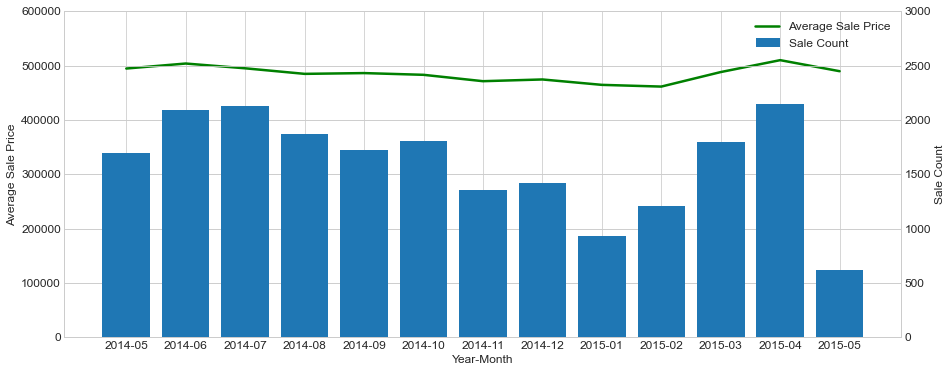

In [31]:
# Plot for mean house sale price and sale count over time
Sale_mean = KingCounty_df.groupby('sale_year_month')['price'].aggregate(['mean'])
Sale_count = KingCounty_df.groupby('sale_year_month')['price'].aggregate(['count'])
y = Sale_mean['mean'].tolist()
y2 = Sale_count['count'].tolist()
x = sorted(KingCounty_df['sale_year_month'].unique())
x = [str(i) for i in x]
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (15,6)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12
ax1 = plt.plot(x, y, linewidth=2.5, label='Average Sale Price', color = 'g')
plt.ylim(0, 600000)
plt.xticks
plt.xlabel('Year-Month')
plt.ylabel('Average Sale Price')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax2=plt.twinx()
ax2.bar(x, y2, label='Sale Count')
ax2.set_ylim(0, 3000)
ax2.set_ylabel('Sale Count')
ax2.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95))
plt.show()

In [32]:
Sale_mean

,mean
sale_year_month,
2014-05,494433.297345
2014-06,503628.440038
2014-07,494840.149788
2014-08,484615.945931
2014-09,486035.849275
2014-10,482859.435314
2014-11,471137.985272
2014-12,474318.719831
2015-01,464390.192926


In [33]:
Sale_count

,count
sale_year_month,
2014-05,1695
2014-06,2093
2014-07,2123
2014-08,1868
2014-09,1725
2014-10,1801
2014-11,1358
2014-12,1417
2015-01,933


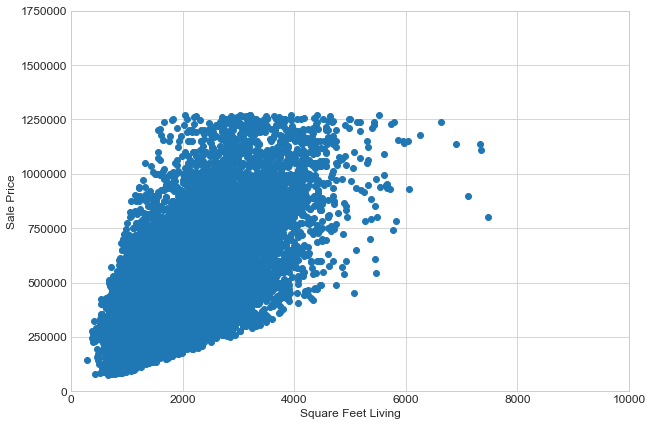

In [34]:
# Scatter plot for sqft_living vs price
plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(KingCounty_df['sqft_living'], KingCounty_df['price'])
plt.yticks(np.arange(0, 1750001, 250000),np.arange(0, 1750001, 250000))
plt.xlim(0, 10000)
plt.ylim(0, 1750000)
plt.xlabel('Square Feet Living')
plt.ylabel('Sale Price')
plt.show()

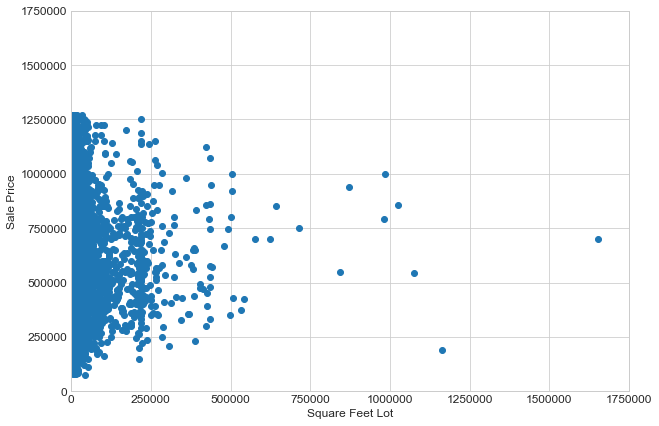

In [35]:
# Scatter plot for sqft_lot vs price
plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(KingCounty_df['sqft_lot'], KingCounty_df['price'])
plt.xticks(np.arange(0, 1750001, 250000),np.arange(0, 1750001, 250000))
plt.yticks(np.arange(0, 1750001, 250000),np.arange(0, 1750001, 250000))
plt.xlim(0, 1750000)
plt.ylim(0, 1750000)
plt.xlabel('Square Feet Lot')
plt.ylabel('Sale Price')
plt.show()

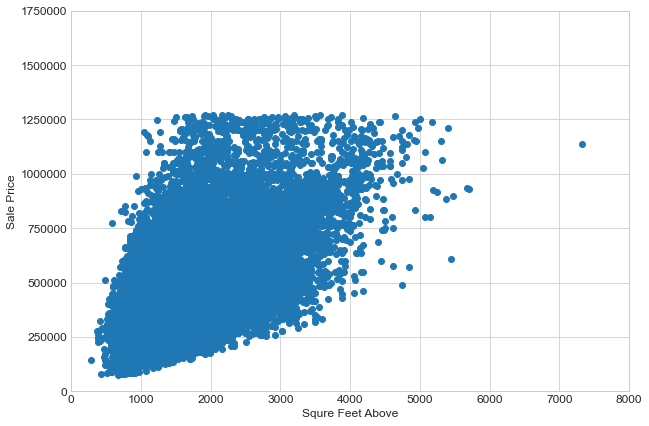

In [36]:
# Scatter plot for sqft_above vs price
plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(KingCounty_df['sqft_above'], KingCounty_df['price'])
plt.yticks(np.arange(0, 1750001, 250000),np.arange(0, 1750001, 250000))
plt.xlim(0, 8000)
plt.ylim(0, 1750000)
plt.xlabel('Squre Feet Above')
plt.ylabel('Sale Price')
plt.show()

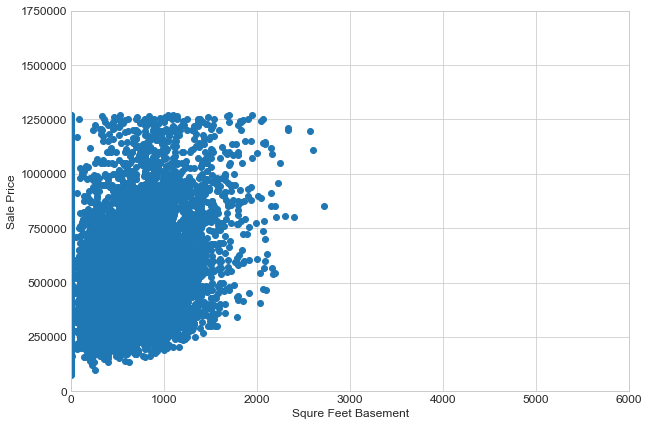

In [37]:
# Scatter plot for sqft_basement vs price
plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(KingCounty_df['sqft_basement'], KingCounty_df['price'])
plt.yticks(np.arange(0, 1750001, 250000),np.arange(0, 1750001, 250000))
plt.xlim(0, 6000)
plt.ylim(0, 1750000)
plt.xlabel('Squre Feet Basement')
plt.ylabel('Sale Price')
plt.show()

In [38]:
Basement_df = KingCounty_df.loc[KingCounty_df.sqft_basement == 0]
Basement_df.sort_values(by=['price'], ascending = [False])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,sale_year_month,age,reno_years,sqft_living_group
12657,20150402T000000,1272500.0,4,1.75,2040,5000,2.0,0,0,4,...,47.6279,-122.315,3220,5600,2015,4,2015-04,94,94,2000 - 2500
2641,20140929T000000,1272000.0,4,2.75,3200,13729,2.0,0,0,3,...,47.6402,-122.171,4050,16921,2014,9,2014-09,30,30,3000 - 3500
20458,20150507T000000,1267500.0,4,3.50,4640,13404,2.0,0,0,3,...,47.5310,-122.134,4690,13590,2015,5,2015-05,8,8,4500 - 5000
19973,20140915T000000,1266520.0,3,2.50,3060,9576,2.0,0,0,3,...,47.5928,-122.199,3060,9579,2014,9,2014-09,9,9,3000 - 3500
19649,20140512T000000,1264000.0,4,3.75,3490,9170,2.0,0,0,3,...,47.5991,-122.200,1810,8470,2014,5,2014-05,2,2,3000 - 3500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,3,...,47.4987,-122.341,1140,11250,2014,11,2014-11,60,60,500 - 1000
16198,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,1,...,47.4808,-122.315,860,9000,2015,3,2015-03,72,72,500 - 1000
465,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,2,...,47.6499,-121.909,1200,7500,2014,5,2014-05,102,102,0 - 500
15293,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,1,...,47.4739,-122.280,1700,10387,2014,5,2014-05,72,72,500 - 1000


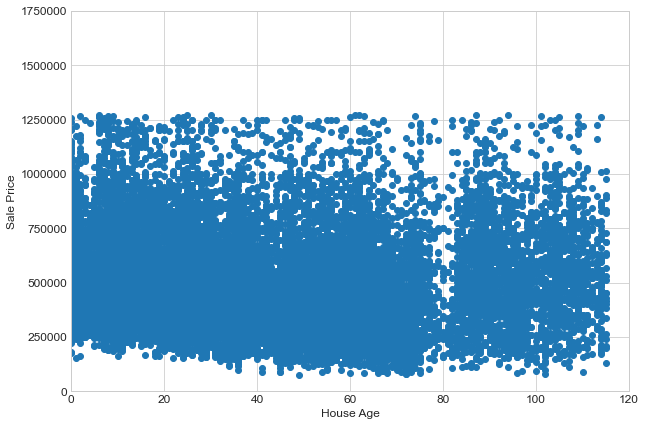

In [39]:
# Scatter plot for house age vs price
plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(KingCounty_df['age'], KingCounty_df['price'])
plt.yticks(np.arange(0, 1750001, 250000),np.arange(0, 1750001, 250000))
plt.xlim(0, 120)
plt.ylim(0, 1750000)
plt.xlabel('House Age')
plt.ylabel('Sale Price')
plt.show()

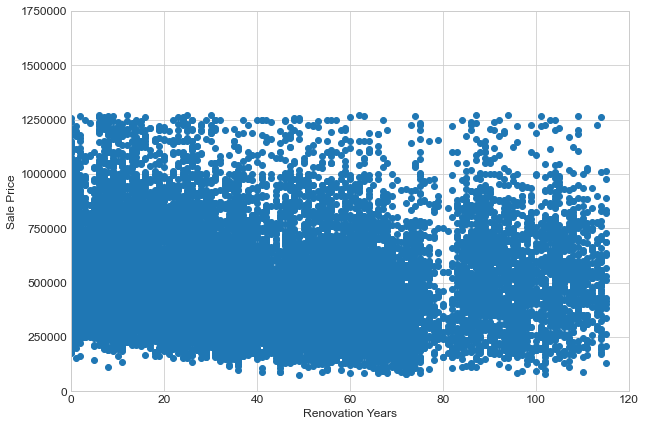

In [40]:
# Scatter plot for number of renovation years vs price
plt.rcParams['figure.figsize'] = (10,7)
plt.scatter(KingCounty_df['reno_years'], KingCounty_df['price'])
plt.yticks(np.arange(0, 1750001, 250000),np.arange(0, 1750001, 250000))
plt.xlim(0, 120)
plt.ylim(0, 1750000)
plt.xlabel('Renovation Years')
plt.ylabel('Sale Price')
plt.show()

In [41]:
### Geographic Variables

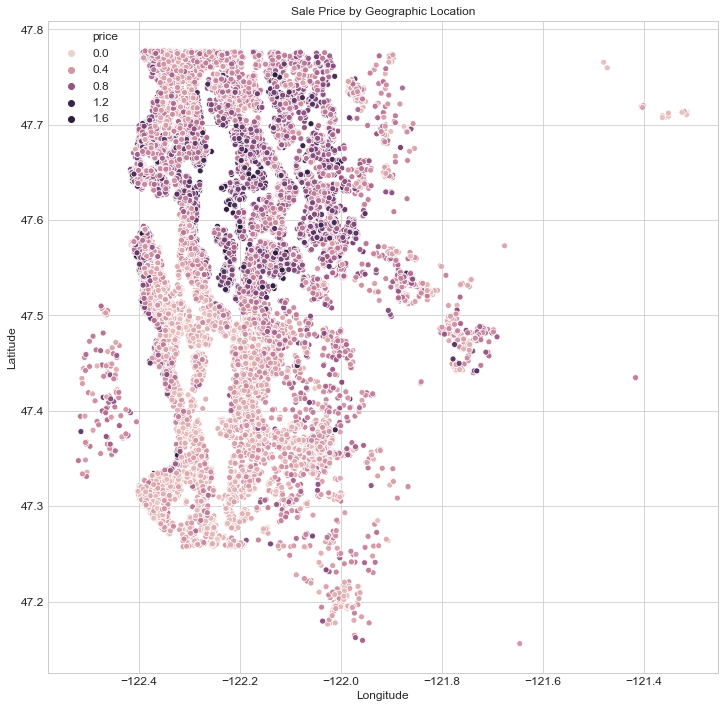

In [42]:
#analysis of latitude and longitude by price
plt.figure(figsize = (12,12))
sns.scatterplot(x='long',y = 'lat', hue = 'price', data = KingCounty_df)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sale Price by Geographic Location');

In [43]:
zip_analysis = KingCounty_df.groupby("zipcode")["price"].agg(["count", "mean", "max", "min"]).reset_index()
zip_analysis['mean'] = zip_analysis['mean'].astype(int)
zip_analysis.sort_values(by=['count'], ascending = [False])

,zipcode,count,mean,max,min
42,98103,592,570748,1205000.0,238000.0
23,98038,589,365198,1180000.0,110000.0
49,98115,569,597688,1240000.0,200000.0
28,98052,568,635696,1250000.0,225000.0
26,98042,548,311632,859000.0,105000.0
...,...,...,...,...,...
41,98102,93,723351,1272500.0,330000.0
47,98109,92,728037,1220000.0,216650.0
14,98024,74,482117,1065000.0,142000.0
61,98148,57,284908,600600.0,105500.0


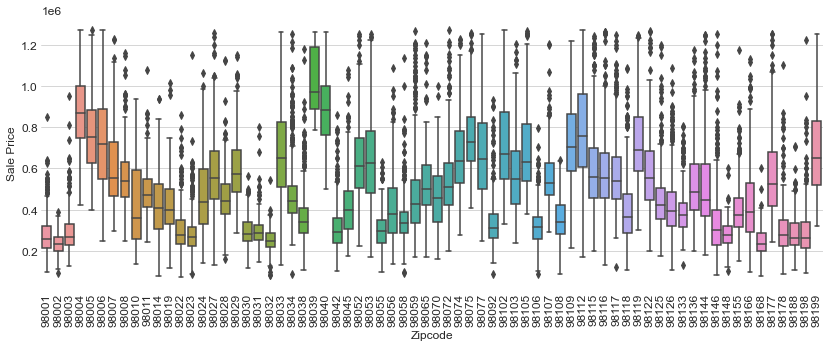

In [44]:
f, axe = plt.subplots(1, 1,figsize=(14,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=KingCounty_df['zipcode'],y=KingCounty_df['price'], ax=axe)
yticklabels = np.arange(0, 8000001, 1000000).tolist()
yticklabels.insert(0, 0)
#axe.set_yticklabels(yticklabels)
#axe.yaxis.tick_left()
axe.set(xlabel='Zipcode', ylabel='Sale Price');
axe.set_xticklabels(zip_analysis['zipcode'], rotation='vertical');

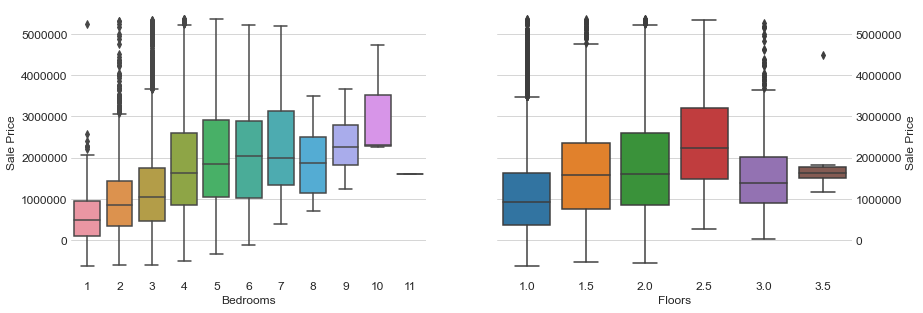

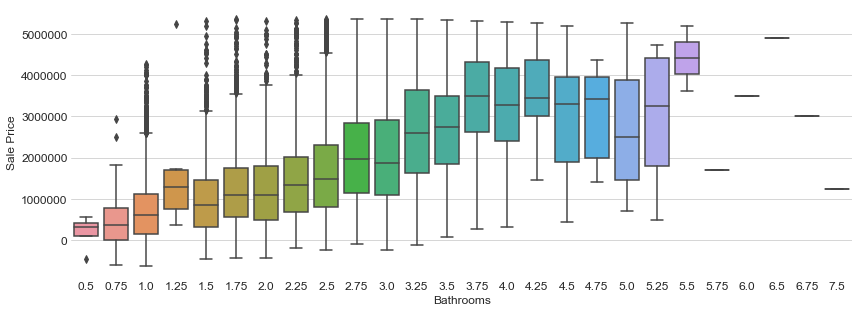

In [45]:
# Boxplot for bedrooms, bathrooms and floors
f, axes = plt.subplots(1, 2,figsize=(14,5))
sns.boxplot(x=KingCounty_df['bedrooms'],y=KingCounty_df['price'], ax=axes[0])
sns.boxplot(x=KingCounty_df['floors'],y=KingCounty_df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
yticklabels = np.arange(0, 8000001, 1000000).tolist()
yticklabels.insert(0, 0)
axes[0].set_yticklabels(yticklabels)
axes[0].set(xlabel='Bedrooms', ylabel='Sale Price')
axes[0].yaxis.tick_left()
axes[1].set_yticklabels(yticklabels)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Sale Price')

f, axe = plt.subplots(1, 1,figsize=(14,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=KingCounty_df['bathrooms'],y=KingCounty_df['price'], ax=axe)
axe.set_yticklabels(yticklabels)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms', ylabel='Sale Price');

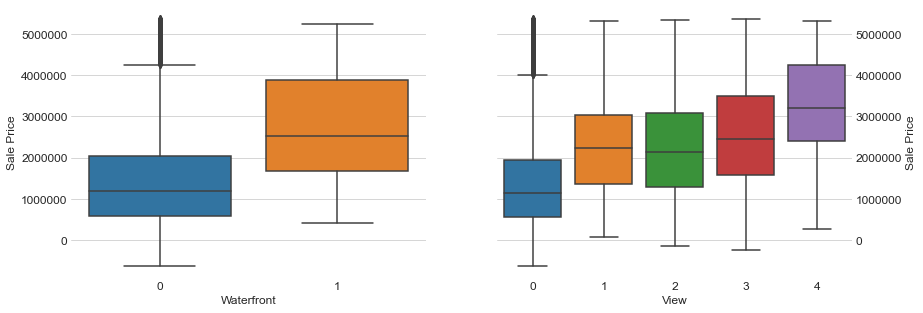

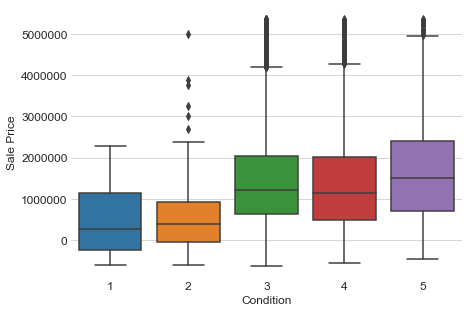

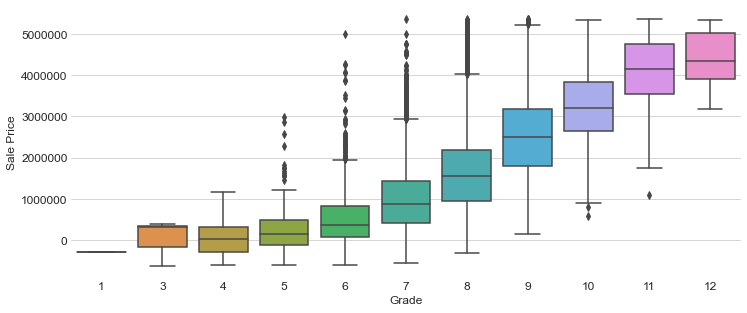

In [46]:
# Boxplots for waterfront, view, condition, grade
f, axes = plt.subplots(1, 2,figsize=(14,5))
sns.boxplot(x=KingCounty_df['waterfront'],y=KingCounty_df['price'], ax=axes[0])
sns.boxplot(x=KingCounty_df['view'],y=KingCounty_df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set_yticklabels(yticklabels)
axes[0].set(xlabel='Waterfront', ylabel='Sale Price')
axes[0].yaxis.tick_left()
axes[1].set_yticklabels(yticklabels)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Sale Price')

f, axe = plt.subplots(1, 1, figsize=(7,5))
sns.boxplot(x=KingCounty_df['condition'],y=KingCounty_df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set_yticklabels(yticklabels)
axe.yaxis.tick_left()
axe.set(xlabel='Condition', ylabel='Sale Price');

f, axe = plt.subplots(1, 1, figsize=(12,5))
sns.boxplot(x=KingCounty_df['grade'],y=KingCounty_df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set_yticklabels(yticklabels)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Sale Price');

### Correlation Matrix

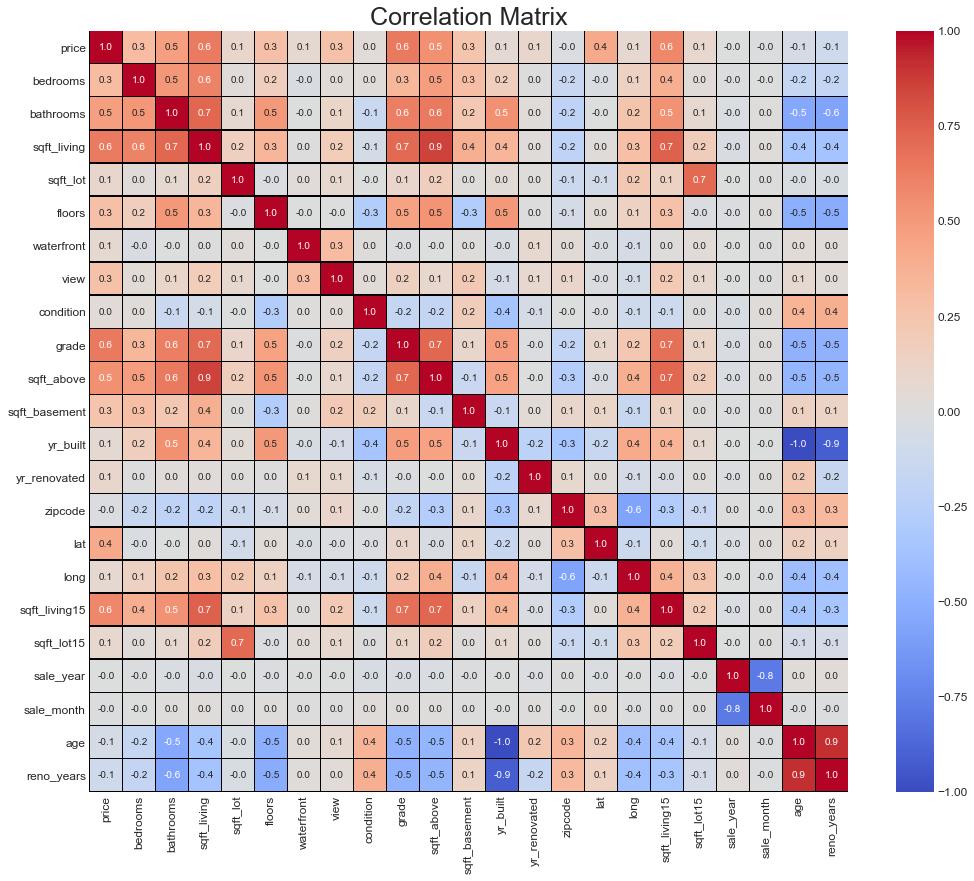

In [47]:
# Correlation Matrix
plt.subplots(figsize=(17,14))
sns.heatmap(KingCounty_df.corr(), cmap = 'coolwarm', vmin=-1, vmax=1, annot=True, linewidths=0.5, linecolor="Black", fmt="1.1f")
plt.title("Correlation Matrix",fontsize=25)
plt.show()

### OLS

In [48]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#pick which variables we want to see the statistical significance of
ols_results = ols('price ~ bedrooms + bathrooms + sqft_living + lat + waterfront + sqft_above + condition + reno_years', data=KingCounty_df).fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     3959.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        01:34:39   Log-Likelihood:            -2.7575e+05
No. Observations:               20770   AIC:                         5.515e+05
Df Residuals:                   20761   BIC:                         5.516e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.989e+07    3.4e+05    -87.800      

## 4. Multiple Linear Regression Model

A few notes about the input x variables for the linear regression model:
- The input x variables excluded zipcode, lat and long because these location variables are not suitable for linear regression model. Spatial analysis should be conducted instead. We will not do spatial analysis in our project.
- sqft_living is highly correlated with sqft_living15, i.e. correlation coefficient is 0.8. sqft_lot is highly correlated with sqft_lot15, i.e. correlation coefficient is 0.7. sqft_above is highly correlated with sqft_living, i.e. correlation coefficient is 0.9. sqft_living15, sqft_lot15 and sqft_above are excluded to prevent overfitting of the model.
- yr_built is converted to age. yr_renovated is converted to reno_years. So age and reno_years are used in the model. yr_built and yr_renovated are excluded.
- The date field is translated to sale_year and sale_month fields. The date field is dropped.
- sqft_living_group is categorical data, which cannot be used in the linear regression model.

In [49]:
# Split train-test data into 70%-30%
KingCounty_train_df,KingCounty_test_df = train_test_split(KingCounty_df,train_size = 0.7,random_state=10)

# Build multiple linear regression model using the train dataset
# we exclude 'grade' from our model, since we are treating this a the model aginst which our model is competing
# reduced different sqft variables to a few as possible without losing too much information (as judged by OLS)
# sqft variables are not independent of each other, thus sought to reduce variables
# of locational parameters, lat seemed to posess most correlation with price. note: this is not generalizable move; works in this context (kings county)
# view seems superfluous if we are already including waterfront
# sqft_above had 0.7 correlation with price
X_variables = ['bedrooms', 'bathrooms','lat', 'sqft_living', 'waterfront', 'sqft_above', 'condition', 'reno_years']
MLR_model = linear_model.LinearRegression()
MLR_model.fit(KingCounty_train_df[X_variables],KingCounty_train_df['price'])

# Model intercept and variable coefficients
print('Intercept: {}'.format(float(format(MLR_model.intercept_,'.3f'))))
print(("Coefficients: ("+', '.join(['%.3f']*len(MLR_model.coef_))+")") % tuple(MLR_model.coef_))

# R-square of the model
print ('Coefficient of determination R^2: {}'.format(float(format(MLR_model.score(KingCounty_train_df[X_variables],KingCounty_train_df['price']),'.4f'))))

Intercept: -30147726.386
Coefficients: (-27960.310, 38425.596, 633875.245, 145.141, 296853.810, 46.250, 27649.311, 901.847)
Coefficient of determination R^2: 0.5987


In [50]:
import sklearn.metrics as metrics

# Predict house price using the test dataset
Y_pred = MLR_model.predict(KingCounty_test_df[X_variables])

# R-square of the model prediction
print ('Coefficient of determination R^2: {}', metrics.r2_score(KingCounty_test_df['price'], Y_pred))

Coefficient of determination R^2: {} 0.6156462781493761


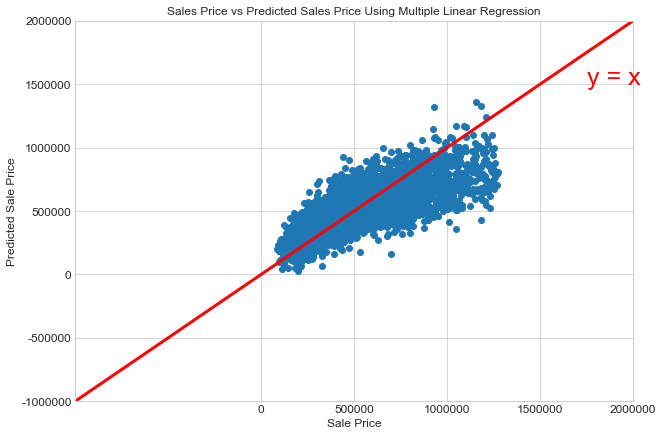

In [51]:
# Compare sale price and predicted sale price for the test dataset
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.scatter(KingCounty_test_df['price'], Y_pred)
plt.plot([-1000000,2000000], [-1000000,2000000], color='red', linewidth=3, label='y = x')
plt.xticks(np.arange(0, 2000001, 500000),np.arange(0, 2000001, 500000))
plt.yticks(np.arange(-1000000, 2000001, 500000),np.arange(-1000000, 2000001, 500000))
plt.xlim(-1000000, 2000000)
plt.ylim(-1000000, 2000000)
plt.xlabel('Sale Price')
plt.ylabel('Predicted Sale Price')
plt.text(1750000, 1500000, 'y = x', color='red', fontsize=25)
plt.title('Sales Price vs Predicted Sales Price Using Multiple Linear Regression')
plt.show()

In [52]:
# scale data with min_max scaler
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# instantiate
scaler = MinMaxScaler()

# scale data
scaler.fit(KingCounty_train_df[X_variables])
X_train_scaled = scaler.transform(KingCounty_train_df[X_variables])
X_test_scaled = scaler.transform(KingCounty_test_df[X_variables])

# plug in scaled data to train model
MLR_model.fit(X_train_scaled,KingCounty_train_df['price'])

# Predict house price using the scaled test dataset
Y_pred_scaled = MLR_model.predict(X_test_scaled)

# R-square of the model prediction
print ('Coefficient of determination R^2: {}', metrics.r2_score(KingCounty_test_df['price'], Y_pred_scaled))

Coefficient of determination R^2: {} 0.615646278149365


In [53]:
# scale data with std scaler
from sklearn.preprocessing import StandardScaler
# instantiate
scaler = StandardScaler()

# scale data
scaler.fit(KingCounty_train_df[X_variables])
X_train_scaled = scaler.transform(KingCounty_train_df[X_variables])
X_test_scaled= scaler.transform(KingCounty_test_df[X_variables])

# plug in scaled data to train model
MLR_model.fit(X_train_scaled,KingCounty_train_df['price'])

# Predict house price using the scaled test dataset
Y_pred_scaled = MLR_model.predict(X_test_scaled)

# R-square of the model prediction
print ('Coefficient of determination R^2: {}', metrics.r2_score(KingCounty_test_df['price'], Y_pred_scaled))

Coefficient of determination R^2: {} 0.615646278149365


We see no improvement in model by scaling data.

## 5. Random Forest (RF) Model

In [54]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

KingCounty_df_RF = KingCounty_df[['price', 'bedrooms','lat','bathrooms', 'sqft_living', 'waterfront', 'sqft_above', 'condition', 'reno_years']]

X=KingCounty_df_RF[['bedrooms', 'bathrooms','lat', 'sqft_living', 'waterfront', 'sqft_above', 'condition', 'reno_years']]  # Features
y=KingCounty_df_RF['price']  # Labels


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# instantiate model
regressor = RandomForestRegressor(n_estimators=50)
regressor_fit = regressor.fit(X_train, y_train)
Y_Pred_RF = regressor_fit.predict(X_test)

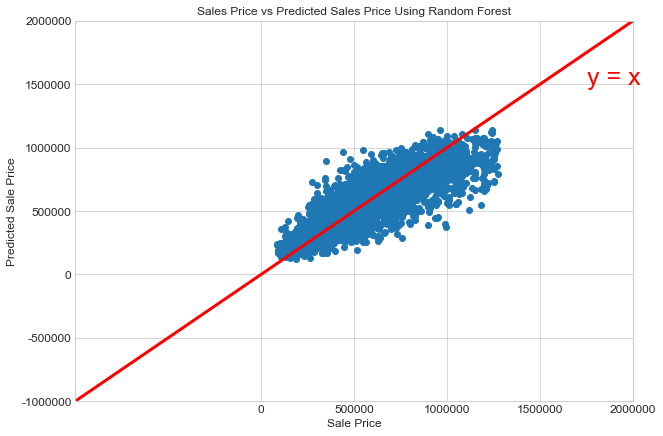

In [55]:
# Compare sale price and predicted sale price for the test dataset
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.scatter(y_test, Y_Pred_RF)
plt.plot([-1000000,2000000], [-1000000,2000000], color='red', linewidth=3, label='y = x')
plt.xticks(np.arange(0, 2000001, 500000),np.arange(0, 2000001, 500000))
plt.yticks(np.arange(-1000000, 2000001, 500000),np.arange(-1000000, 2000001, 500000))
plt.xlim(-1000000, 2000000)
plt.ylim(-1000000, 2000000)
plt.xlabel('Sale Price')
plt.ylabel('Predicted Sale Price')
plt.text(1750000, 1500000, 'y = x', color='red', fontsize=25)
plt.title('Sales Price vs Predicted Sales Price Using Random Forest')
plt.show()

In [56]:
# R-square of the model prediction
print ('Coefficient of determination R^2: {}', metrics.r2_score(y_test, Y_Pred_RF))

Coefficient of determination R^2: {} 0.762146663419372


In [57]:
# See how accuracy of model as number of trees varies
# create df we will need to capture results of loops
df_n = pd.DataFrame({'n_trees': [], 'R^2': []})
 # create df we will need to capture averages of results
df_n_average = pd.DataFrame({'n_trees':  [], 'Average_R^2': []})
# only for number of neighbors k: 2, 10, 20, 50, 70, 80, 100, create array for loop to use for validation
n_trees=[2, 10, 20, 50, 70, 80, 100]
# nested loops, outermost loop ranges over neighbour n's, innermost loop to produce 10 random splits
for n in range(1,101):
    if n in n_trees:
        for i in range(0,10):
                # within innermost loop, run fit, capture results by populating them in dataframe df_n
                X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y, test_size=0.3)
                regressor_i = RandomForestRegressor(n_estimators=n)
                regressor_i_fit = regressor_i.fit(X_train_i,y_train_i)
                y_pred_RF_i = regressor_i_fit.predict(X_test_i)
                r2_i = metrics.r2_score(y_test_i, y_pred_RF_i)
                df_n = df_n.append({'n_trees': n, 'R^2': r2_i}, ignore_index=True)
        # within outermost loop, run fit, capture averages (for each k) by populating them in dataframe df_k_average       
        avg_r2_n=df_n['R^2'].mean()
        df_n_average = df_n_average.append({'n_trees': n, 'Average_R^2': avg_r2_n}, ignore_index=True)  

In [58]:
# produce average r^2 score by n
print(df_n_average)

   n_trees  Average_R^2
0      2.0     0.658578
1     10.0     0.704365
2     20.0     0.723562
3     50.0     0.735223
4     70.0     0.742653
5     80.0     0.746580
6    100.0     0.750329


### Feature Importance

In [59]:
#This gives a DF based on feature importance
df_imp = pd.DataFrame(regressor_fit.feature_importances_, index=X_train.columns, columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_imp

,Feature Importance
sqft_living,0.439637
lat,0.383514
reno_years,0.060566
sqft_above,0.053671
bathrooms,0.021338
bedrooms,0.016322
condition,0.014985
waterfront,0.009968


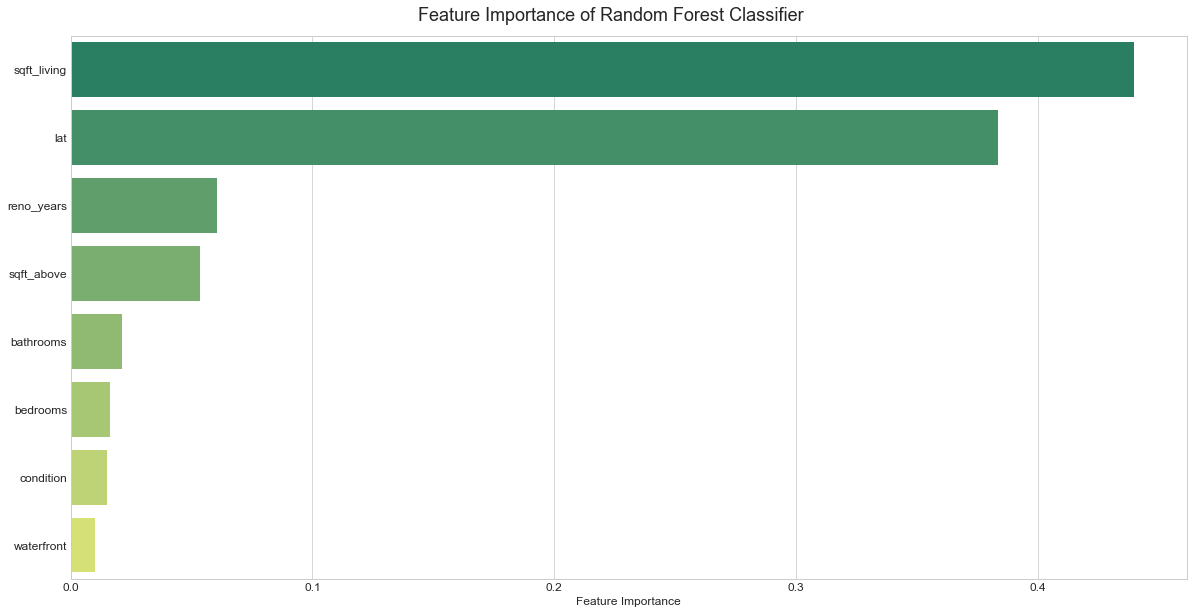

In [60]:
#This give a graph of feature importance
fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x="Feature Importance", y=df_imp.index, data=df_imp, palette="summer")
fig.suptitle("Feature Importance of Random Forest Classifier", y=0.92, fontsize=18);

## 6. Artificial Neural Network (ANN) Model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [62]:
KingCounty_df_ANN = KingCounty_df[['price', 'bedrooms','lat','bathrooms', 'sqft_living', 'waterfront', 'sqft_above', 'condition', 'reno_years']]

X = KingCounty_df_ANN[['bedrooms','lat','bathrooms', 'sqft_living', 'waterfront', 'sqft_above', 'condition', 'reno_years']]  # Features
Y = KingCounty_df_ANN['price']  # Labels

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test

In [63]:
model_ANN = Sequential()
model_ANN.add(Dense(24,activation='relu'))
model_ANN.add(Dense(20,activation='relu'))
model_ANN.add(Dense(15,activation='relu'))
model_ANN.add(Dense(10,activation='relu'))
model_ANN.add(Dense(1, activation='linear'))
model_ANN.compile(optimizer='Adam',loss='mse')

In [64]:
model_ANN.fit(x=X_train,y=Y_train,
          validation_data=(X_test,Y_test),
          batch_size=128,epochs=400)

Epoch 1/400

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

114/114 [==============================] - 0s 2ms/step - loss: 277307392000.0000 - val_loss: 249991168000.0000
Epoch 2/400
114/114 [==============================] - 0s 931us/step - loss: 116340023296.0000 - val_loss: 32793360384.0000
Epoch 3/400
114/114 [==============================] - 0s 880us/step - loss: 32592465920.0000 - val_loss: 32489895936.0000
Epoch 4/400
114/114 [==============================] - 0s 893us/step - loss: 32385939456.0000 - val_loss: 32351248384.0000
Epoch 5/400
114

Epoch 127/400
114/114 [==============================] - 0s 915us/step - loss: 28315807744.0000 - val_loss: 28078233600.0000
Epoch 128/400
114/114 [==============================] - 0s 912us/step - loss: 28344279040.0000 - val_loss: 28140224512.0000
Epoch 129/400
114/114 [==============================] - 0s 899us/step - loss: 28313585664.0000 - val_loss: 28135958528.0000
Epoch 130/400
114/114 [==============================] - 0s 894us/step - loss: 28293042176.0000 - val_loss: 28155400192.0000
Epoch 131/400
114/114 [==============================] - 0s 872us/step - loss: 28304019456.0000 - val_loss: 28052711424.0000
Epoch 132/400
114/114 [==============================] - 0s 931us/step - loss: 28283346944.0000 - val_loss: 28049520640.0000
Epoch 133/400
114/114 [==============================] - 0s 968us/step - loss: 28267456512.0000 - val_loss: 28152821760.0000
Epoch 134/400
114/114 [==============================] - 0s 864us/step - loss: 28302321664.0000 - val_loss: 28048345088.0000


114/114 [==============================] - 0s 871us/step - loss: 27662528512.0000 - val_loss: 27421655040.0000
Epoch 258/400
114/114 [==============================] - 0s 894us/step - loss: 27662442496.0000 - val_loss: 27402532864.0000
Epoch 259/400
114/114 [==============================] - 0s 921us/step - loss: 27669745664.0000 - val_loss: 27438022656.0000
Epoch 260/400
114/114 [==============================] - 0s 882us/step - loss: 27667642368.0000 - val_loss: 27381596160.0000
Epoch 261/400
114/114 [==============================] - 0s 915us/step - loss: 27656642560.0000 - val_loss: 27414937600.0000
Epoch 262/400
114/114 [==============================] - 0s 890us/step - loss: 27754979328.0000 - val_loss: 27429158912.0000
Epoch 263/400
114/114 [==============================] - 0s 855us/step - loss: 27626209280.0000 - val_loss: 27383140352.0000
Epoch 264/400
114/114 [==============================] - 0s 896us/step - loss: 27686854656.0000 - val_loss: 27396925440.0000
Epoch 265/400


Epoch 388/400
114/114 [==============================] - 0s 904us/step - loss: 26418700288.0000 - val_loss: 26106882048.0000
Epoch 389/400
114/114 [==============================] - 0s 920us/step - loss: 26383136768.0000 - val_loss: 26643185664.0000
Epoch 390/400
114/114 [==============================] - 0s 912us/step - loss: 26402336768.0000 - val_loss: 26002561024.0000
Epoch 391/400
114/114 [==============================] - 0s 1ms/step - loss: 26354444288.0000 - val_loss: 25969111040.0000
Epoch 392/400
114/114 [==============================] - 0s 1ms/step - loss: 26397081600.0000 - val_loss: 26028238848.0000
Epoch 393/400
114/114 [==============================] - 0s 920us/step - loss: 26365767680.0000 - val_loss: 26251089920.0000
Epoch 394/400
114/114 [==============================] - 0s 891us/step - loss: 26348791808.0000 - val_loss: 26016944128.0000
Epoch 395/400
114/114 [==============================] - 0s 936us/step - loss: 26307540992.0000 - val_loss: 25950521344.0000
Epoc

In [65]:
model_ANN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                216       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 1,202
Trainable params: 1,202
Non-trainable params: 0
_________________________________________________________________


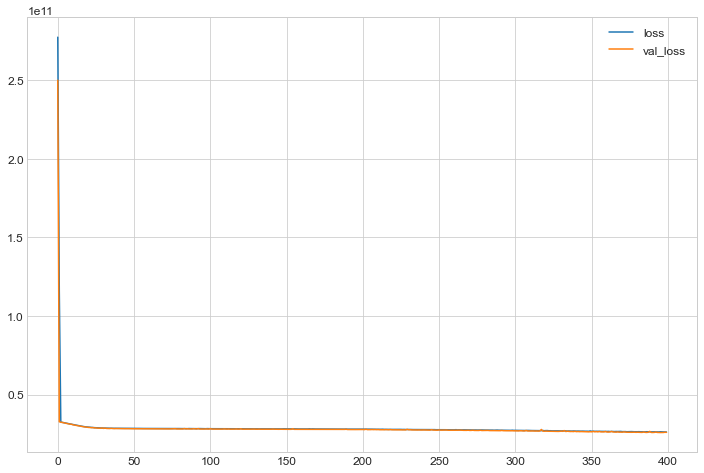

In [66]:
loss_df = pd.DataFrame(model_ANN.history.history)
loss_df.plot(figsize=(12,8));

MAE: 126474.3237203599
MSE: 26046942361.245502
RMSE: 161390.65140597674
VarScore: 0.48731832349944904


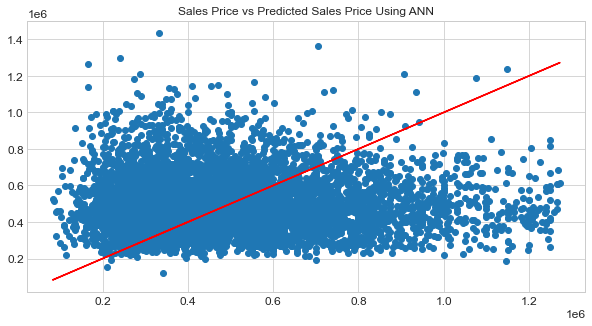

In [67]:
y_pred = model_ANN.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(Y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.title('Sales Price vs Predicted Sales Price Using ANN');
# Perfect predictions
plt.plot(y_test,y_test,'r');


In [68]:
# R-square of the model prediction
print ('Coefficient of determination R^2: {}', metrics.r2_score(Y_test, y_pred))

Coefficient of determination R^2: {} 0.4849052314265656


# Analysis

The best model was Random Forest by a slight margin over Linear Regression and slightly larger model than the Artificial Neural Network model. Moreover, as we can see, arbitrarily increasing the number of trees has diminshing returns with respect to accuracy, so it is unnecessary to make it computationally more extensive than it already is at 50 trees.

# Comparison

In [70]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

KingCounty_df_RF = KingCounty_df[['price', 'bedrooms','lat','bathrooms', 'sqft_living', 'waterfront', 'sqft_above', 'condition', 'reno_years']]

X=KingCounty_df_RF[['bedrooms', 'bathrooms','lat', 'sqft_living', 'waterfront', 'sqft_above', 'condition', 'reno_years']]  # Features
y=KingCounty_df_RF['price']  # Labels


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# instantiate model
regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor_fit = regressor.fit(X_train, y_train)
Y_Pred_RF = regressor_fit.predict(X_test)

In [71]:
# create actual model for dataset
KingCounty_df_Model = KingCounty_df[['price', 'bedrooms','lat','bathrooms', 'sqft_living', 'waterfront', 'sqft_above', 'condition', 'reno_years']]

X=KingCounty_df_Model[['bedrooms', 'bathrooms','lat', 'sqft_living', 'waterfront', 'sqft_above', 'condition', 'reno_years']]  # Features
y=KingCounty_df_Model['price']  # Labels

# instantiate model
regressor_Model = RandomForestRegressor(n_estimators=50, random_state=0)
data_regressor_fit = regressor_Model.fit(X, y)
Y_Pred_RF_Model = data_regressor_fit.predict(X)

# transform predicated sales value to grade
def RF_grade(i): 
    if i >= 450000: return 12
    elif i >= 400000: return 11
    elif i >= 350000: return 10
    elif i >= 300000: return 9
    elif i >= 250000: return 8
    elif i >= 200000: return 7
    elif i >= 150000: return 6
    elif i >= 100000: return 5
    elif i >= 50000: return 4
    else : return 3
 
    
# add Random Forest grade to dataframe
df_RF_Grade = [RF_grade(i) for i in Y_Pred_RF_Model]
KingCounty_df['RF_Grade'] = df_RF_Grade

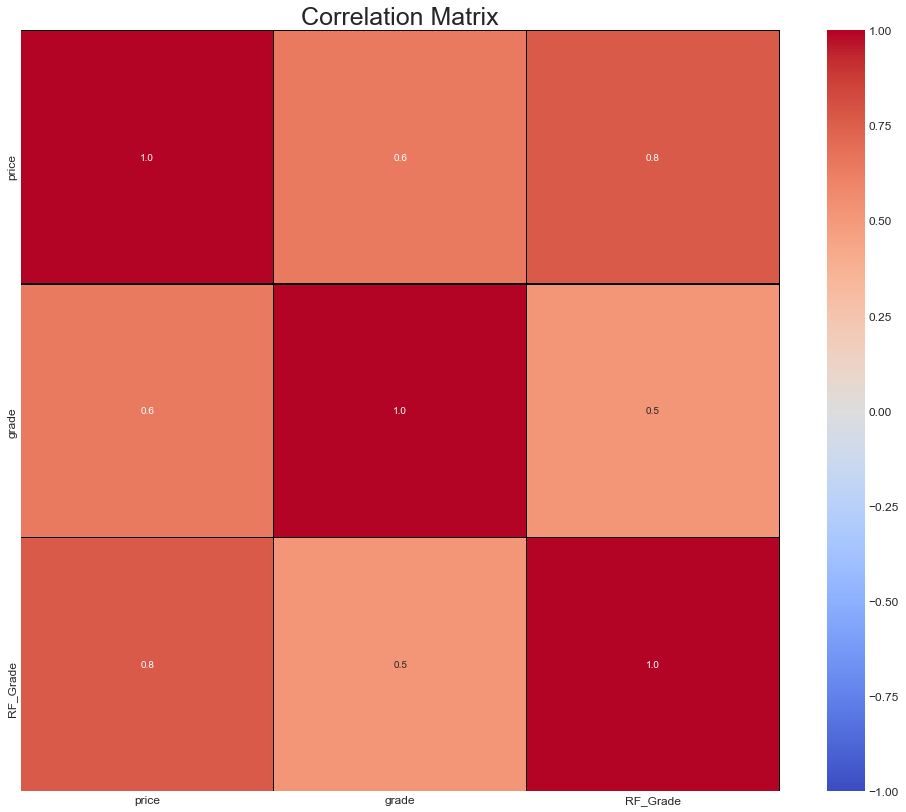

In [72]:
# Correlation Matrix
KingCounty_df_grades = KingCounty_df[['price', 'grade','RF_Grade']]
plt.subplots(figsize=(17,14))
sns.heatmap(KingCounty_df_grades.corr(), cmap = 'coolwarm', vmin=-1, vmax=1, annot=True, linewidths=0.5, linecolor="Black", fmt="1.1f")
plt.title("Correlation Matrix",fontsize=25)
plt.show()

Price has a 0.8 correlation with our grading system; 0.6 correlation with KG grade. Therefore, we have demonstrated we had set out to do.

In [73]:
#Comparing original grading system values with the new grading values
KingCounty_df[['price', 'grade', 'RF_Grade' ]].head(10)

,price,grade,RF_Grade
0,221900.0,7,7
1,538000.0,7,12
2,180000.0,6,7
3,604000.0,7,12
4,510000.0,8,12
5,1225000.0,11,12
6,257500.0,7,8
7,291850.0,7,8
8,229500.0,7,8
9,323000.0,7,9
